<a href="https://colab.research.google.com/github/mehedimahmudcse/INSE6220/blob/main/INSE6220_Mehedi_40262404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install slim version (default)
!pip install pycaret

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/mehedimahmudcse/INSE6220/refs/heads/main/employee_churn_data.csv')
# df = df.drop(columns=['left'])
df['salary'] = df['salary'].replace({
    'high': 3,
    'medium': 2,
    'low': 1
})
# df['left'] = df['left'].replace({
#     'no': 0,
#     'yes': 1
# })
df.loc[:,["department","promoted","review","projects","salary","tenure","satisfaction","bonus","avg_hrs_month"]]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
0,operations,0,0.577569,3,1,5.0,0.626759,0,180.866070
1,operations,0,0.751900,3,2,6.0,0.443679,0,182.708149
2,support,0,0.722548,3,2,6.0,0.446823,0,184.416084
3,logistics,0,0.675158,4,3,8.0,0.440139,0,188.707545
4,sales,0,0.676203,3,3,5.0,0.577607,1,179.821083
...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,2,8.0,0.543641,0,188.155738
9536,logistics,0,0.746887,3,2,8.0,0.549048,0,188.176164
9537,operations,0,0.557980,3,1,7.0,0.705425,0,186.531008
9538,IT,0,0.584446,4,2,8.0,0.607287,1,187.641370


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   int64  
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 745.4+ KB


In [34]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [35]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [36]:
df.dtypes

,0
department,object
promoted,int64
review,float64
projects,int64
salary,int64
tenure,float64
satisfaction,float64
bonus,int64
avg_hrs_month,float64
left,object


In [37]:
df.isnull().any()

,0
department,False
promoted,False
review,False
projects,False
salary,False
tenure,False
satisfaction,False
bonus,False
avg_hrs_month,False
left,False


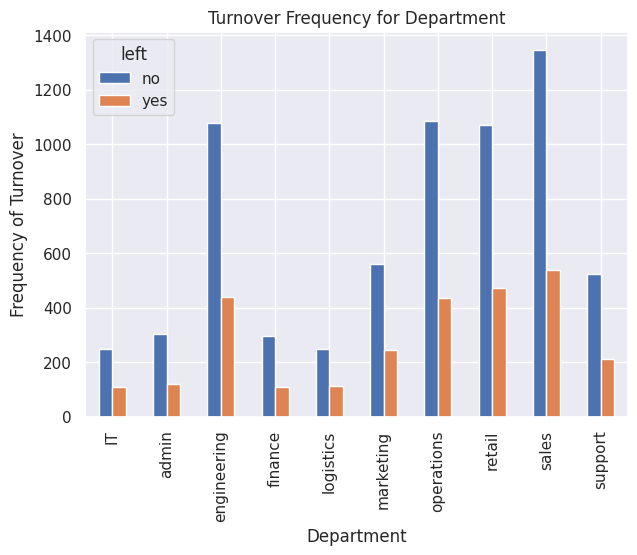

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.department,df.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

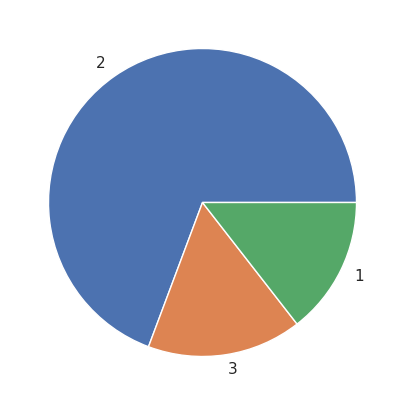

In [6]:
y =df['salary']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [12]:
X = df.drop(columns=['left'])

# Encode categorical variables
X = pd.get_dummies(X, columns=['department'], drop_first=True)  # One-hot encode 'department'

# Ensure all columns are numeric
X_numeric = X.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [28]:
# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)
print("MATRIX: ",pca.components_)
matrix = pca.components_

# Create a covariance matrix from your data
cov_matrix = np.cov(matrix, rowvar=False)  # Set rowvar=False if rows are samples

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues (λ):")
print(eigenvalues)
first_eigenvector = eigenvectors[:, 0]
z1 = matrix @ first_eigenvector
print("Z1:")
print(z1)
# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_[:-1])
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_[:-1]))
print(f"Number of components: {len(pca.explained_variance_ratio_[:-1])}")

MATRIX:  [[ 7.13714519e-04 -2.06618429e-01  2.78573300e-02  8.94179323e-03
   6.85891261e-01 -1.18973408e-01  1.44770147e-04  6.86913979e-01]
 [-2.80687734e-02 -6.85809999e-01 -3.98684908e-04 -3.86779072e-03
  -4.43282212e-02  7.24912226e-01  8.70402153e-03 -3.63755927e-02]
 [ 2.54946872e-01  1.03178787e-02  6.69463561e-01 -6.43448622e-01
  -5.14676727e-03  1.25866940e-02  2.69124352e-01 -8.67260677e-03]
 [ 8.13779889e-01 -2.41248553e-02  1.70383742e-01  3.06336966e-01
  -7.11637440e-03  1.50720202e-02 -4.62542039e-01 -9.18585656e-03]
 [ 4.17099765e-01 -1.70043979e-02 -2.27017517e-01  2.77813791e-01
  -6.71539184e-04 -8.69305651e-03  8.34831853e-01 -9.69061911e-04]
 [ 3.12628332e-01 -2.00909631e-02 -6.85575198e-01 -6.44050241e-01
   1.51681237e-02 -7.57018621e-03 -1.28760091e-01  1.33892665e-02]
 [-1.61430462e-02 -6.96778724e-01  2.14652578e-02 -7.21370241e-03
  -1.69709031e-01 -6.78105346e-01 -5.27075948e-03 -1.58335786e-01]]
Eigenvalues (λ):
[ 6.36205266e-33  1.66666667e-01 -1.214306

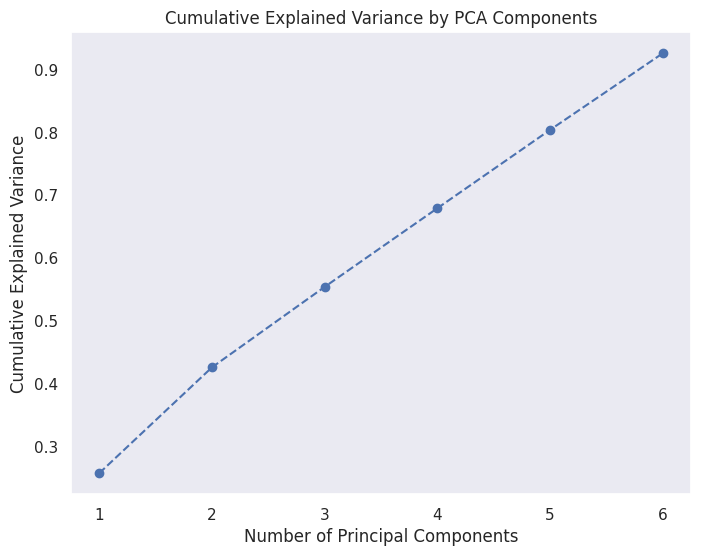

In [14]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_[:-1]) + 1), np.cumsum(pca.explained_variance_ratio_[:-1]), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

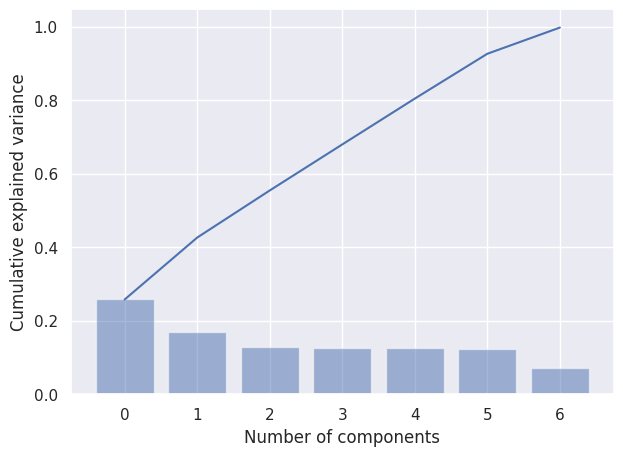

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

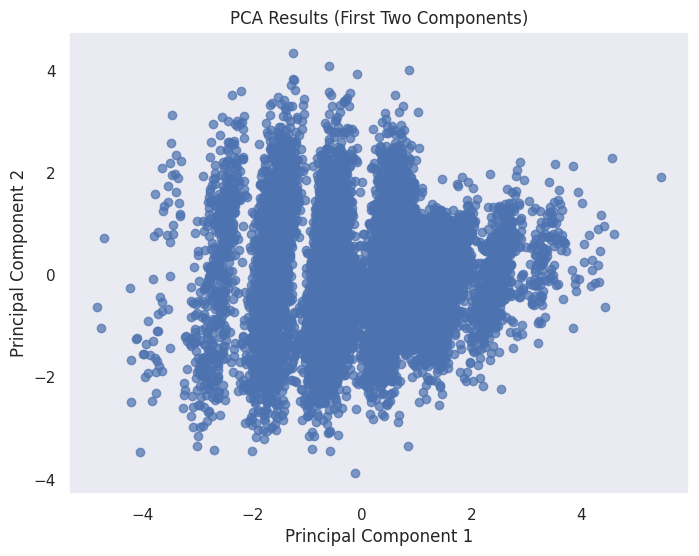

In [15]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA Results (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [16]:
# PCA-transformed DataFrame
X_pca_final = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Example: Add the target variable back
X_pca_final['left'] = df['left']


Text(0, 0.5, 'Explained variance')

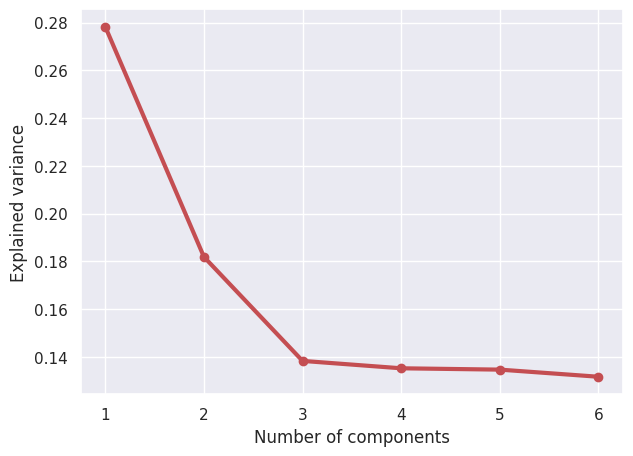

In [17]:
# df = df.drop(columns=['left'])
#Eigenvalues
Lambda = pca.explained_variance_[:-1]

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

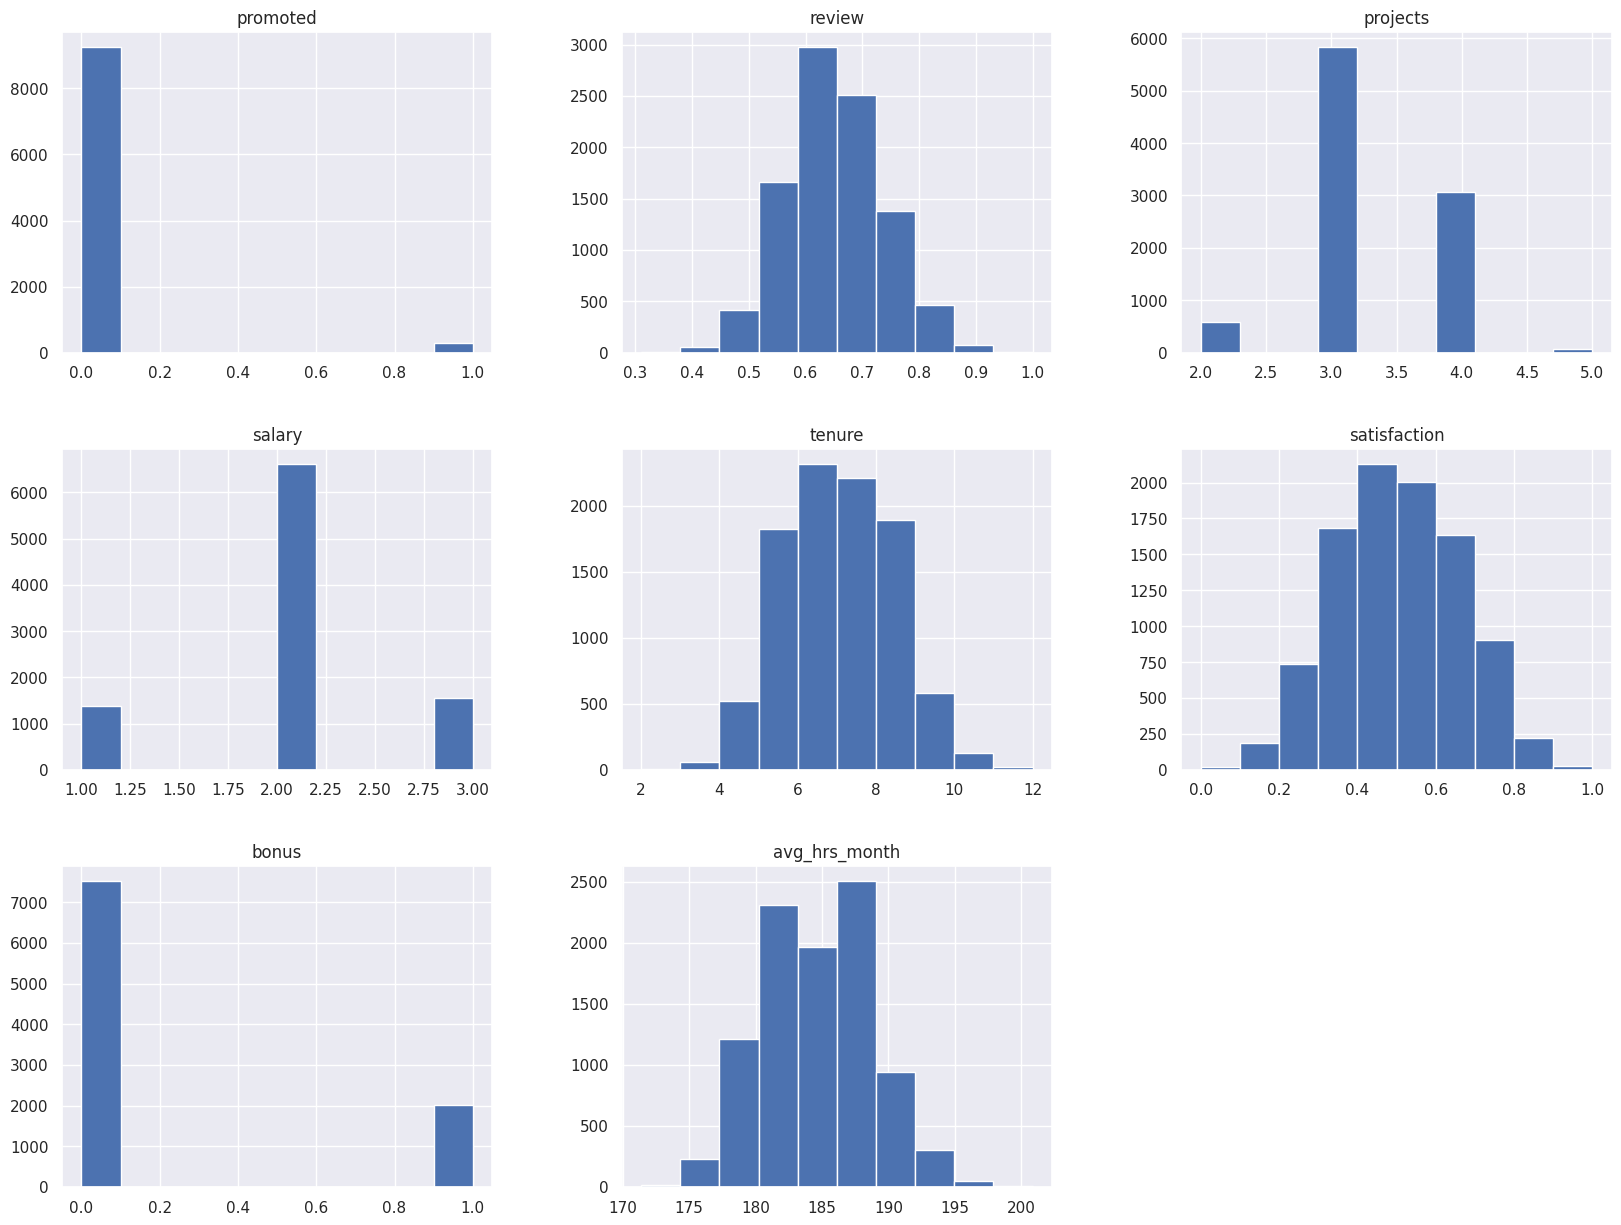

In [18]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("turnover_histogram_plots")
plt.show()

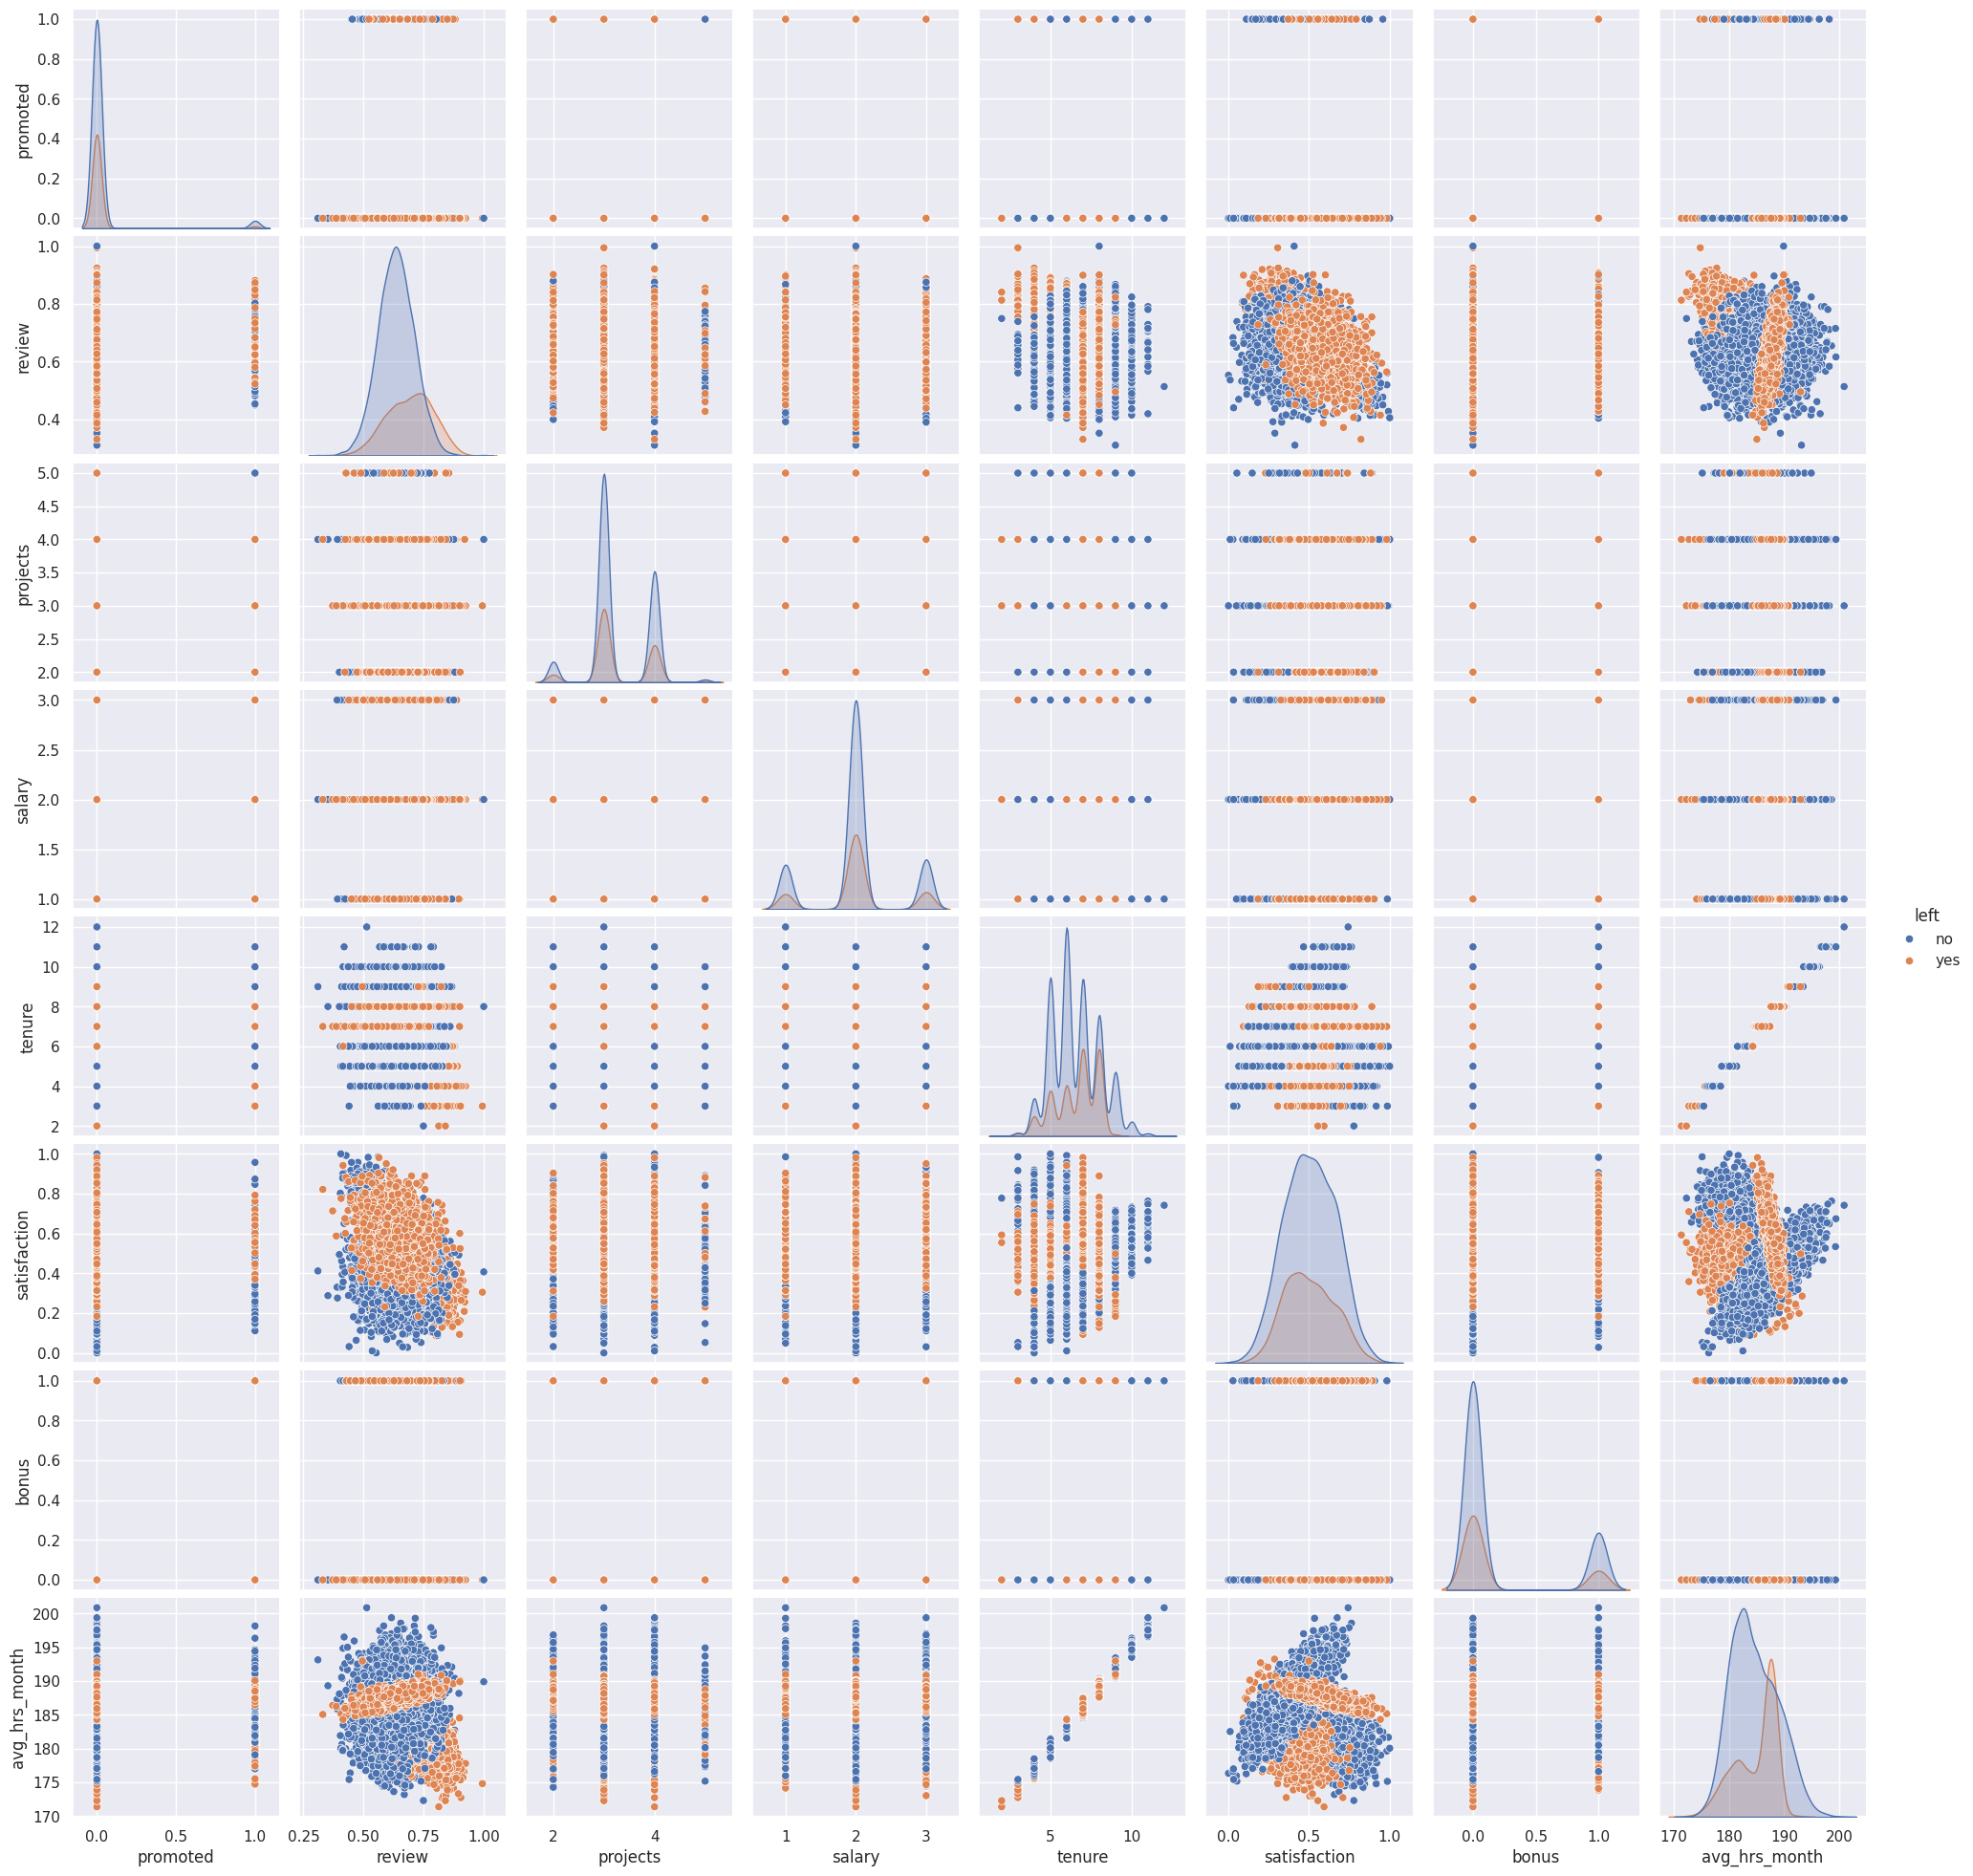

In [22]:
sns.pairplot(df, hue='left')
plt.show()

<ipython-input-23-4e6743a6f098>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


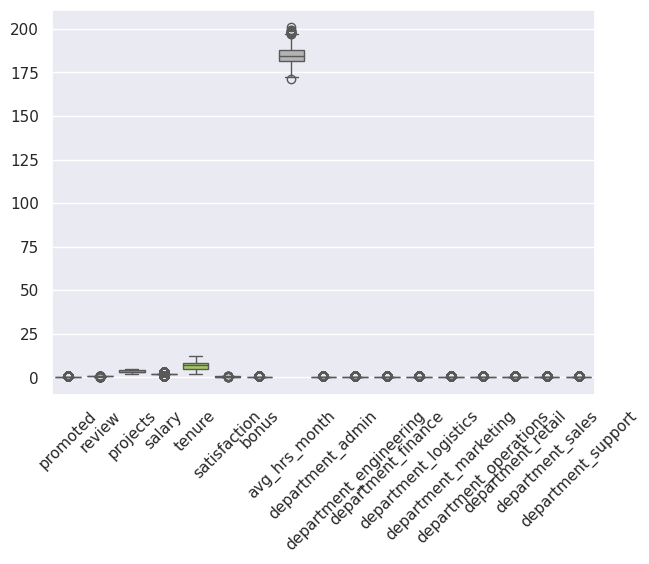

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix:
                        promoted    review  projects    salary    tenure  \
promoted                1.000000  0.001879  0.010107  0.001039  0.001410   
review                  0.001879  1.000000  0.000219 -0.003665 -0.184133   
projects                0.010107  0.000219  1.000000 -0.020884  0.022596   
salary                  0.001039 -0.003665 -0.020884  1.000000  0.005097   
tenure                  0.001410 -0.184133  0.022596  0.005097  1.000000   
satisfaction           -0.011704 -0.349778  0.002714 -0.004510 -0.146246   
bonus                   0.001072 -0.003627  0.002654 -0.007137 -0.000392   
avg_hrs_month          -0.002190 -0.196096  0.021299  0.007697  0.978618   
department_admin        0.009465 -0.011971  0.001531  0.008823 -0.008730   
department_engineering -0.018276 -0.006242 -0.008249  0.002310  0.000572   
department_finance      0.020767  0.007642  0.006769  0.004675 -0.017173   
department_logistics   -0.012535  0.005914  0.000054 -0.005266 -0.00

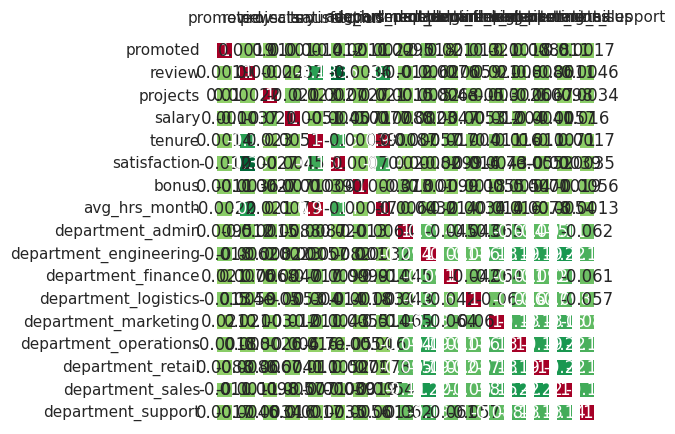

<Figure size 1000x800 with 0 Axes>

In [21]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

correlation_matrix = X.corr()

#Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Find highly correlated pairs
threshold = 0.85  # Set your threshold for high correlation
high_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)]
print("Highly Correlated Features:")
print(high_corr)

ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=4.5, annot=True, cbar=False, square=True)
plt.figure(figsize=(10, 8))
#plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Step 1: Define Features (X) and Target (y)
df = df.drop(columns=['department'])
X = df.drop(columns=['left'])  # Features

df.info()
y = df['left']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promoted       9540 non-null   int64  
 1   review         9540 non-null   float64
 2   projects       9540 non-null   int64  
 3   salary         9540 non-null   int64  
 4   tenure         9540 non-null   float64
 5   satisfaction   9540 non-null   float64
 6   bonus          9540 non-null   int64  
 7   avg_hrs_month  9540 non-null   float64
 8   left           9540 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 670.9+ KB
Confusion Matrix:
[[1257   73]
 [ 431  147]]

Classification Report:
              precision    recall  f1-score   support

          no       0.74      0.95      0.83      1330
         yes       0.67      0.25      0.37       578

    accuracy                           0.74      1908
   macro avg       0.71      0.60      0.60      1908
weigh

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the Numerical Features (Optional but Recommended)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply scaling to the test set as well

# Step 5: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1177  153]
 [ 122  456]]

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.88      0.90      1330
         yes       0.75      0.79      0.77       578

    accuracy                           0.86      1908
   macro avg       0.83      0.84      0.83      1908
weighted avg       0.86      0.86      0.86      1908


Accuracy Score: 0.8558700209643606


In [97]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Make Predictions
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[852 478]
 [161 417]]

Classification Report:
              precision    recall  f1-score   support

          no       0.84      0.64      0.73      1330
         yes       0.47      0.72      0.57       578

    accuracy                           0.67      1908
   macro avg       0.65      0.68      0.65      1908
weighted avg       0.73      0.67      0.68      1908


Accuracy Score: 0.6650943396226415


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Define Features (X) and Target (y)
df = df.drop(columns=['department'])
X = df.drop(columns=['left'])  # Features

df.info()
y = df['left']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Random Forest Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# SVM Model
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

# Step 3: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Standardize the Numerical Features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply scaling to the test set as well

# Step 5: Initialize the models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42)
}

# Step 6: Train and Evaluate Models
results = []

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Get the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (yes)': class_report['yes']['precision'],
        'Recall (yes)': class_report['yes']['recall'],
        'F1-Score (yes)': class_report['yes']['f1-score'],
        'Precision (no)': class_report['no']['precision'],
        'Recall (no)': class_report['no']['recall'],
        'F1-Score (no)': class_report['no']['f1-score'],
        'Confusion Matrix': confusion
    })

# Step 7: Display the Results
results_df = pd.DataFrame(results)
print(results_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promoted       9540 non-null   int64  
 1   review         9540 non-null   float64
 2   projects       9540 non-null   int64  
 3   salary         9540 non-null   int64  
 4   tenure         9540 non-null   float64
 5   satisfaction   9540 non-null   float64
 6   bonus          9540 non-null   int64  
 7   avg_hrs_month  9540 non-null   float64
 8   left           9540 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 670.9+ KB
                 Model  Accuracy  Precision (yes)  Recall (yes)  \
0  Logistic Regression  0.662474         0.462921      0.712803   
1        Random Forest  0.845388         0.721440      0.797578   
2                  SVM  0.665618         0.466887      0.731834   

   F1-Score (yes)  Precision (no)  Recall (no)  F1-Score (no)  \
0        0.5

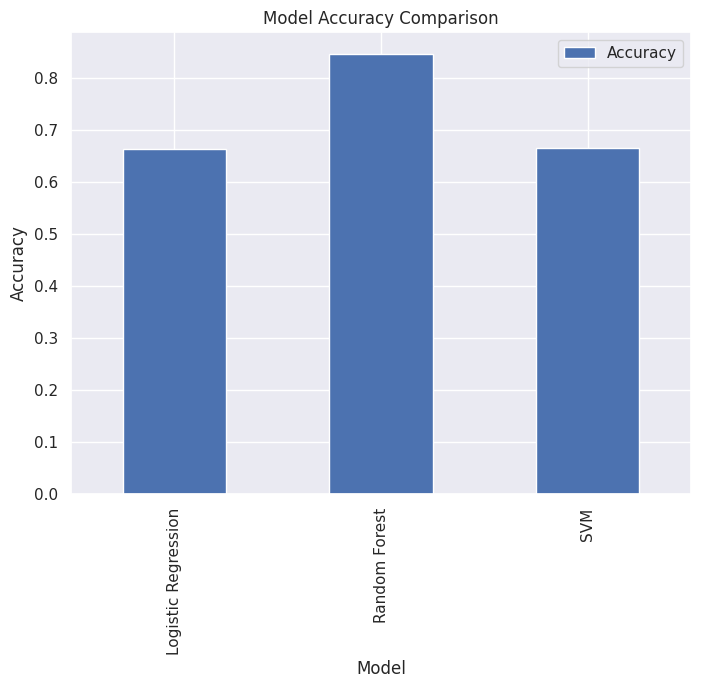

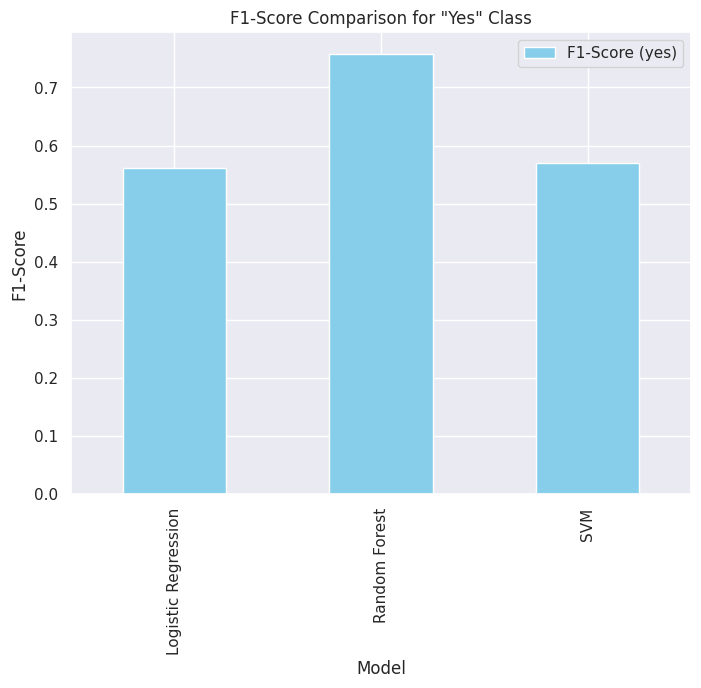

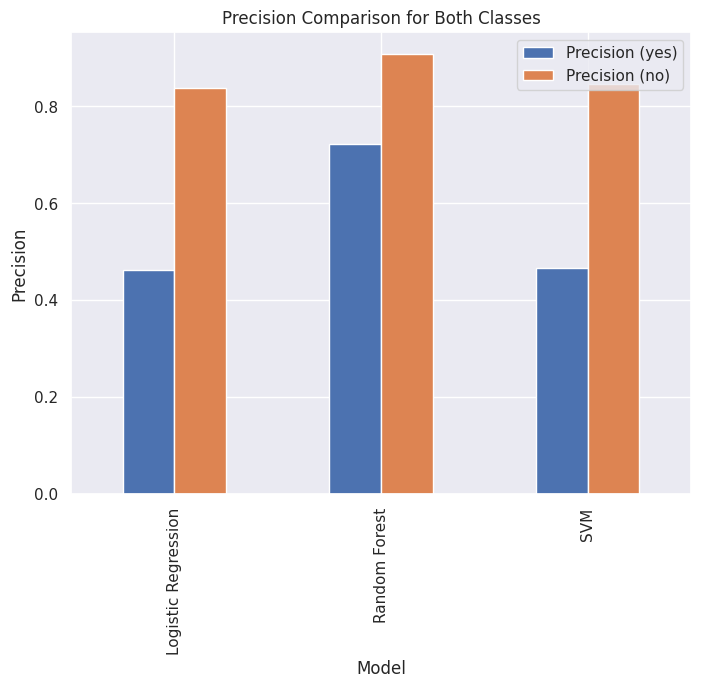

In [105]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
results_df.set_index('Model')[['Accuracy']].plot(kind='bar', figsize=(8, 6))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot F1-Score comparison (for "yes" class)
results_df.set_index('Model')[['F1-Score (yes)']].plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('F1-Score Comparison for "Yes" Class')
plt.ylabel('F1-Score')
plt.show()

# Plot Precision comparison for both classes
results_df.set_index('Model')[['Precision (yes)', 'Precision (no)']].plot(kind='bar', figsize=(8, 6))
plt.title('Precision Comparison for Both Classes')
plt.ylabel('Precision')
plt.show()


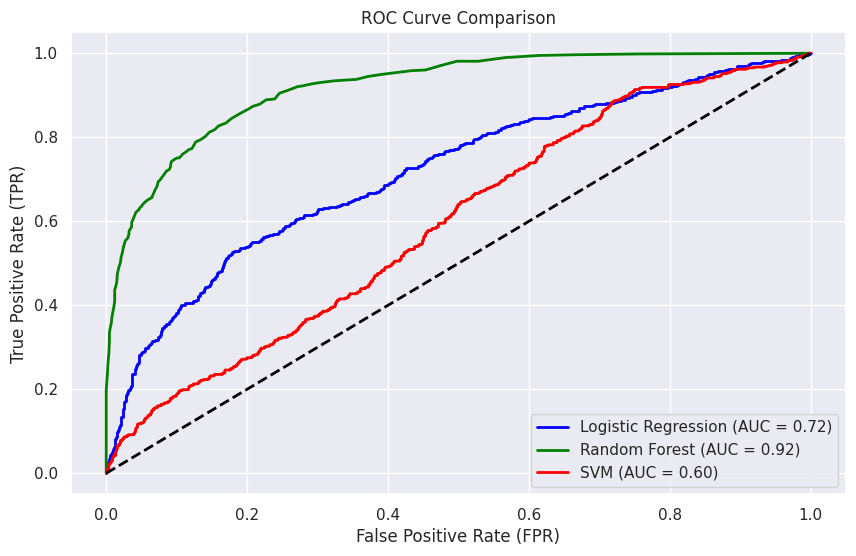

In [109]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your DataFrame is df and the target column is 'left'

# 1. Encode the target variable 'left' ('no' = 0, 'yes' = 1)
label_encoder = LabelEncoder()
df['left'] = label_encoder.fit_transform(df['left'])  # This will convert 'no' -> 0 and 'yes' -> 1

# 2. Prepare data
df = df.drop(columns=['department'])
X = df.drop('left', axis=1)  # Features (drop target column 'left')
y = df['left']  # Target labels (encoded)

# 3. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train models

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Random Forest Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# SVM Model
model_svm = SVC(probability=True)  # Ensure SVM provides probabilities
model_svm.fit(X_train, y_train)

# 5. Get predicted probabilities for the positive class (i.e., 'yes' class, which is 1)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]

# 6. Compute ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 7. Plot ROC curve
plt.figure(figsize=(10, 6))

# Plot each model's ROC curve
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Labels and title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()
